In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tags = ['2D_0.05fs', '2D_0.03fs', '2D_0.02fs']
simulations = ['0.05fs', '0.03fs', '0.02fs']

CSS_list = []
XT_list = []
iCT_list = []
niCT_list = []

In [3]:
for t in range(len(tags)):

    
    total_XT_single_populations = np.loadtxt(f'{simulations[t]}/{tags[t]}_XT_individual_populations.txt')
    XT_list.append(total_XT_single_populations)

    CSS_single_populations = np.loadtxt(f'{simulations[t]}/{tags[t]}_CSS_individual_populations.txt')
    CSS_list.append(CSS_single_populations)
    INT_single_populations = np.loadtxt(f'{simulations[t]}/{tags[t]}_INT_individual_populations.txt')
    iCT_list.append(INT_single_populations)
    #FS_single_populations = np.loadtxt(analysis_path_optical + '/physopt_0.01fs_FS_individual_populations.txt')

    CT_single_populations = 1 - INT_single_populations - total_XT_single_populations - CSS_single_populations
    total_CT_single_populations = CT_single_populations + CSS_single_populations + INT_single_populations
    niCT_list.append(CT_single_populations)

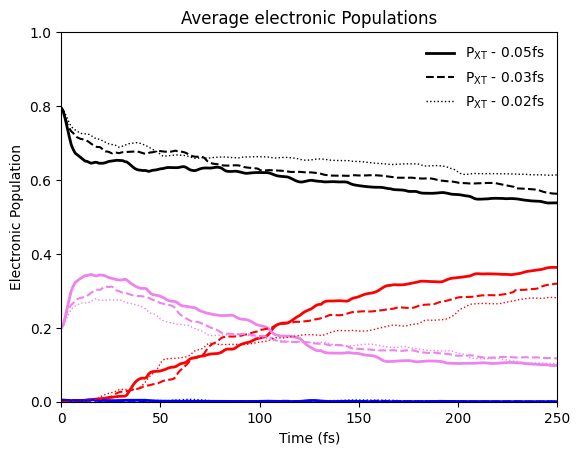

In [8]:
styles = ['solid' , '--', 'dotted']
widths = [2, 1.5, 1]
labels = [r'P$_{\mathrm{XT}}$ - 0.05fs', r'P$_{\mathrm{XT}}$ - 0.03fs', r'P$_{\mathrm{XT}}$ - 0.02fs']
time_axes = [np.arange(len(XT_list[0][0])), np.arange(len(XT_list[1][0]))*0.03*20, np.arange(len(XT_list[2][0]))*0.02*50]

fig, ax = plt.subplots(nrows=1, ncols=1)

for t in range(len(tags)):

    ax.plot(time_axes[t], np.mean(XT_list[t], axis=0), linewidth=widths[t], color='k', linestyle=styles[t], label=labels[t])
    ax.plot(time_axes[t], np.mean(iCT_list[t], axis=0), linewidth=widths[t], color='r', linestyle=styles[t])
    ax.plot(time_axes[t], np.mean(niCT_list[t], axis=0), linewidth=widths[t], color='violet', linestyle=styles[t])
    ax.plot(time_axes[t], np.mean(CSS_list[t], axis=0), linewidth=widths[t], color='b', linestyle=styles[t])

ax.set_xlim([0,250])
ax.set_ylim([0,1])
ax.set_ylabel('Electronic Population')
ax.set_xlabel('Time (fs)')
ax.set_title('Average electronic Populations')
ax.legend(frameon=False)

Text(0.5, 1.0, 'Average Energy Drift vs Nuclear Timestep')

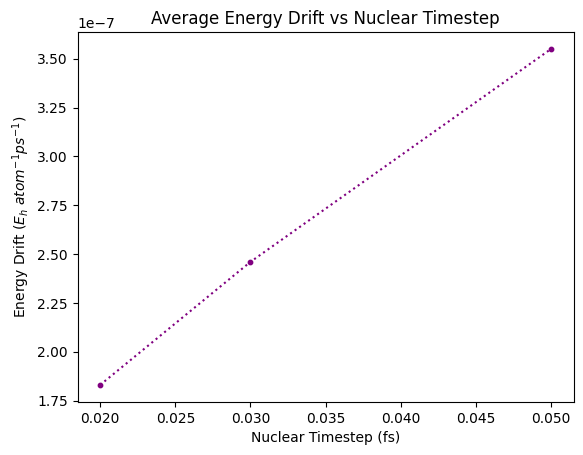

In [9]:
#only taking first 200fs for each sim
energy_drifts = [1.83e-7, 2.46e-7, 3.55e-7]
timesteps = [0.02, 0.03, 0.05]

fig,ax = plt.subplots(nrows=1,ncols=1)

ax.plot(timesteps, energy_drifts, linestyle='dotted', color='purple')
ax.scatter(timesteps, energy_drifts, s=10, color='purple')
ax.set_xlabel('Nuclear Timestep (fs)')
ax.set_ylabel('Energy Drift ($E_{h}$ $atom^{-1} ps^{-1}$)')
ax.set_title('Average Energy Drift vs Nuclear Timestep')